# Fraud Detection in Insurance Claims
#### Help insurance companies identify which policies are fraudulent


for brief description of data and project refer to readme.md

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

In [20]:
train_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,187,37,125591,2013-08-08,IN,500/1000,1000,1412.06,5000000,450947,...,?,57700,5770,5770,46160,Nissan,Maxima,2000,0,NaN
1,243,44,967713,1997-12-25,IL,250/500,500,809.11,0,600208,...,YES,51400,5140,10280,35980,Honda,Civic,1996,0,NaN
2,24,33,649082,1996-01-19,IL,500/1000,1000,1922.84,0,431277,...,NO,46800,4680,9360,32760,Jeep,Wrangler,2002,0,NaN
3,215,42,519312,2008-10-28,OH,500/1000,500,1848.81,0,435489,...,YES,68520,11420,5710,51390,Suburu,Legacy,2003,1,NaN
4,85,30,190588,2001-12-09,OH,100/300,1000,796.35,0,614166,...,YES,58960,5360,10720,42880,Ford,F150,2004,0,NaN


In [21]:
print(train_df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


In [22]:
row,col=train_df.shape
print("Total num of rows in our dataset :",row)
print("Total num of features in our dataset :",col)

Total num of rows in our dataset : 700
Total num of features in our dataset : 40


In [6]:
drop_col = ['_c39','policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
train_df = train_df.drop(columns=drop_col)

In [7]:
train_df =train_df.replace('?',np.nan)

In [5]:
train_df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,187,37,500/1000,1000,1412.06,5000000,FEMALE,Masters,protective-serv,not-in-family,...,1,NaN,0,3,NaN,57700,5770,5770,46160,0
1,243,44,250/500,500,809.11,0,MALE,JD,craft-repair,other-relative,...,3,NaN,2,1,YES,51400,5140,10280,35980,0
2,24,33,500/1000,1000,1922.84,0,FEMALE,High School,machine-op-inspct,wife,...,1,NaN,2,1,NO,46800,4680,9360,32760,0
3,215,42,500/1000,500,1848.81,0,MALE,JD,transport-moving,own-child,...,3,YES,2,2,YES,68520,11420,5710,51390,1
4,85,30,100/300,1000,796.35,0,FEMALE,MD,craft-repair,own-child,...,3,YES,2,1,YES,58960,5360,10720,42880,0


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           700 non-null    int64  
 1   age                          700 non-null    int64  
 2   policy_csl                   700 non-null    object 
 3   policy_deductable            700 non-null    int64  
 4   policy_annual_premium        700 non-null    float64
 5   umbrella_limit               700 non-null    int64  
 6   insured_sex                  700 non-null    object 
 7   insured_education_level      700 non-null    object 
 8   insured_occupation           700 non-null    object 
 9   insured_relationship         700 non-null    object 
 10  capital-gains                700 non-null    int64  
 11  capital-loss                 700 non-null    int64  
 12  incident_type                700 non-null    object 
 13  collision_type      

In [26]:
train_df.isnull().sum()


months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 123
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                259
bodily_injuries                  0
witnesses                        0
police_report_available        247
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [42]:
train_df['collision_type'].value_counts()

Rear Collision     208
Side Collision     194
Front Collision    175
Name: collision_type, dtype: int64

In [44]:
train_df['property_damage'].value_counts()

NO     223
YES    218
Name: property_damage, dtype: int64

In [56]:
train_df['police_report_available'].value_counts().index[0]

'NO'

In [28]:
df = train_df.copy()
col_to_impute = ['collision_type','property_damage','police_report_available']
def zeroone(x):
    if x is np.nan:
        return 1
    return 0
for col in col_to_impute:
    df['imputed'+col] = df[col].apply(zeroone)
    val_to_impute =df[col].value_counts().index[0]
    df[col]=df[col].fillna(val_to_impute)

df.isna().any()

months_as_customer                False
age                               False
policy_csl                        False
policy_deductable                 False
policy_annual_premium             False
umbrella_limit                    False
insured_sex                       False
insured_education_level           False
insured_occupation                False
insured_relationship              False
capital-gains                     False
capital-loss                      False
incident_type                     False
collision_type                    False
incident_severity                 False
authorities_contacted             False
incident_hour_of_the_day          False
number_of_vehicles_involved       False
property_damage                   False
bodily_injuries                   False
witnesses                         False
police_report_available           False
total_claim_amount                False
injury_claim                      False
property_claim                    False


In [13]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,imputedcollision_type,imputedproperty_damage,imputedpolice_report_available
0,187,37,500/1000,1000,1412.06,5000000,FEMALE,Masters,protective-serv,not-in-family,...,3,NO,57700,5770,5770,46160,0,0,1,1
1,243,44,250/500,500,809.11,0,MALE,JD,craft-repair,other-relative,...,1,YES,51400,5140,10280,35980,0,0,1,0
2,24,33,500/1000,1000,1922.84,0,FEMALE,High School,machine-op-inspct,wife,...,1,NO,46800,4680,9360,32760,0,0,1,0
3,215,42,500/1000,500,1848.81,0,MALE,JD,transport-moving,own-child,...,2,YES,68520,11420,5710,51390,1,0,0,0
4,85,30,100/300,1000,796.35,0,FEMALE,MD,craft-repair,own-child,...,1,YES,58960,5360,10720,42880,0,0,0,0


In [57]:
df = train_df.copy()
col_to_impute = ['collision_type','property_damage','police_report_available']
for col in col_to_impute:
    val_to_impute =df[col].value_counts().index[0]
    df[col]=df[col].fillna(val_to_impute)

df.isna().any()

months_as_customer             False
age                            False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
witnesses                      False
police_report_available        False
total_claim_amount             False
injury_claim                   False
property_claim                 False
vehicle_claim                  False
fraud_reported                 False
d

In [58]:
df = train_df.copy()
col_to_impute = ['collision_type','property_damage','police_report_available']
for col in col_to_impute:
    val_to_impute ='Unknown'
    df[col]=df[col].fillna(val_to_impute)

df.isna().any()

months_as_customer             False
age                            False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
witnesses                      False
police_report_available        False
total_claim_amount             False
injury_claim                   False
property_claim                 False
vehicle_claim                  False
fraud_reported                 False
d

In [29]:
categorical_df = df.select_dtypes(include=['object']).copy()

In [7]:
categorical_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'],
      dtype='object')

## Onehot encoding categorical columns

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto',drop=None,sparse=False)
onehot_df = pd.DataFrame(encoder.fit_transform(categorical_df))

In [31]:
onehot_df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [32]:
onehot_col = list(encoder.get_feature_names())
onehot_df.columns = onehot_col

In [33]:
onehot_df.head()

,x0_100/300,x0_250/500,x0_500/1000,x1_FEMALE,x1_MALE,x2_Associate,x2_College,x2_High School,x2_JD,x2_MD,...,x7_Trivial Damage,x8_Ambulance,x8_Fire,x8_None,x8_Other,x8_Police,x9_NO,x9_YES,x10_NO,x10_YES
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [34]:
encoder = OneHotEncoder(categories='auto',drop='first',sparse=False)
dummy_df = pd.DataFrame(encoder.fit_transform(categorical_df))

In [35]:
dummy_col = list(encoder.get_feature_names())
dummy_df.columns = dummy_col

In [36]:
dummy_df.head()

,x0_250/500,x0_500/1000,x1_MALE,x2_College,x2_High School,x2_JD,x2_MD,x2_Masters,x2_PhD,x3_armed-forces,...,x6_Side Collision,x7_Minor Damage,x7_Total Loss,x7_Trivial Damage,x8_Fire,x8_None,x8_Other,x8_Police,x9_YES,x10_YES
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [37]:
encoder.get_feature_names()

array(['x0_250/500', 'x0_500/1000', 'x1_MALE', 'x2_College',
       'x2_High School', 'x2_JD', 'x2_MD', 'x2_Masters', 'x2_PhD',
       'x3_armed-forces', 'x3_craft-repair', 'x3_exec-managerial',
       'x3_farming-fishing', 'x3_handlers-cleaners',
       'x3_machine-op-inspct', 'x3_other-service', 'x3_priv-house-serv',
       'x3_prof-specialty', 'x3_protective-serv', 'x3_sales',
       'x3_tech-support', 'x3_transport-moving', 'x4_not-in-family',
       'x4_other-relative', 'x4_own-child', 'x4_unmarried', 'x4_wife',
       'x5_Parked Car', 'x5_Single Vehicle Collision', 'x5_Vehicle Theft',
       'x6_Rear Collision', 'x6_Side Collision', 'x7_Minor Damage',
       'x7_Total Loss', 'x7_Trivial Damage', 'x8_Fire', 'x8_None',
       'x8_Other', 'x8_Police', 'x9_YES', 'x10_YES'], dtype=object)

In [61]:
numerical_df = df.select_dtypes(exclude=['object']).copy().drop(columns=['fraud_reported'])
Y= df['fraud_reported']
numerical_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,imputedcollision_type,imputedproperty_damage,imputedpolice_report_available
0,187,37,1000,1412.06,5000000,60100,0,21,1,0,3,57700,5770,5770,46160,0,1,1
1,243,44,500,809.11,0,33200,0,4,3,2,1,51400,5140,10280,35980,0,1,0
2,24,33,1000,1922.84,0,0,-45200,0,1,2,1,46800,4680,9360,32760,0,1,0
3,215,42,500,1848.81,0,0,-49000,20,3,2,2,68520,11420,5710,51390,0,0,0
4,85,30,1000,796.35,0,72400,-77000,9,3,2,1,58960,5360,10720,42880,0,0,0


In [62]:
from sklearn.preprocessing import StandardScaler
standerdiser = StandardScaler()
standerdiser_df = pd.DataFrame(standerdiser.fit_transform(numerical_df))


In [63]:
standerdiser_df.columns=numerical_df.columns

In [52]:
normalized_df.shape

(700, 18)

In [51]:
normalized_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,imputedcollision_type,imputedproperty_damage,imputedpolice_report_available
0,-0.162972,-0.229889,-0.241936,0.669332,1.709559,1.223805,0.923434,1.344504,-0.840965,-1.216040,1.368643,0.200192,-0.346474,-0.325496,0.453461,-0.461705,1.304877,1.354256
1,0.320054,0.534328,-1.060075,-1.760610,-0.482183,0.263892,0.923434,-1.098183,1.092288,1.230018,-0.428824,-0.041219,-0.475384,0.619067,-0.091439,-0.461705,1.304877,-0.738413
2,-1.568922,-0.666584,-0.241936,2.727821,-0.482183,-0.920834,-0.667965,-1.672933,-0.840965,1.230018,-0.428824,-0.217488,-0.569509,0.426385,-0.263794,-0.461705,1.304877,-0.738413
3,0.078541,0.315980,-1.060075,2.429474,-0.482183,-0.920834,-0.801755,1.200817,1.092288,1.230018,0.469909,0.614806,0.809628,-0.338062,0.733405,-0.461705,-0.766356,-0.738413
4,-1.042769,-0.994105,-0.241936,-1.812034,-0.482183,1.662725,-1.787578,-0.379746,1.092288,1.230018,-0.428824,0.248474,-0.430368,0.711219,0.277894,-0.461705,-0.766356,-0.738413


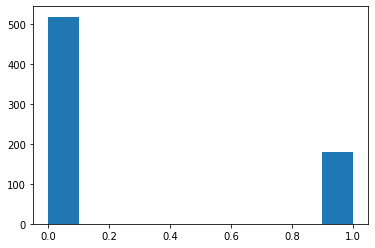

In [84]:
plt.hist(df['fraud_reported'])
plt.show()

In [64]:
final_onehot_df = pd.concat([onehot_df,standerdiser_df],axis=1)
final_dummy_df = pd.concat([dummy_df,standerdiser_df],axis=1)


In [65]:
final_onehot_df

,x0_100/300,x0_250/500,x0_500/1000,x1_FEMALE,x1_MALE,x2_Associate,x2_College,x2_High School,x2_JD,x2_MD,...,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,imputedcollision_type,imputedproperty_damage,imputedpolice_report_available
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.840965,-1.216040,1.368643,0.200192,-0.346474,-0.325496,0.453461,-0.461705,1.304877,1.354256
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.092288,1.230018,-0.428824,-0.041219,-0.475384,0.619067,-0.091439,-0.461705,1.304877,-0.738413
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.840965,1.230018,-0.428824,-0.217488,-0.569509,0.426385,-0.263794,-0.461705,1.304877,-0.738413
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.092288,1.230018,0.469909,0.614806,0.809628,-0.338062,0.733405,-0.461705,-0.766356,-0.738413
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.092288,1.230018,-0.428824,0.248474,-0.430368,0.711219,0.277894,-0.461705,-0.766356,-0.738413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.840965,-1.216040,1.368643,0.294840,0.711410,0.757296,0.032208,-0.461705,1.304877,-0.738413
696,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.092288,-1.216040,-0.428824,0.694510,-0.082514,1.423307,0.627958,-0.461705,-0.766356,1.354256
697,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.092288,1.230018,-1.327558,0.177967,0.420850,-0.537027,0.275753,-0.461705,-0.766356,-0.738413
698,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.092288,0.006989,-1.327558,-0.635167,-0.057960,-0.782069,-0.672201,-0.461705,1.304877,-0.738413


In [67]:
def imputeCategoricalVarible(df):
    col_to_impute = ['collision_type','property_damage','police_report_available']
    def zeroone(x):
        if x is np.nan:
            return 1
        return 0
    for col in col_to_impute:
        df['imputed'+col] = df[col].apply(zeroone)
        val_to_impute =df[col].value_counts().index[0]
        df[col]=df[col].fillna(val_to_impute)
    return df

def preprocessing(data):
    drop_col = ['_c39','policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
    data = data.drop(columns=drop_col)
    data = data.replace('?',np.nan)
    data = imputeCategoricalVarible(data)
    categorical_df = data.select_dtypes(include=['object']).copy()
    encoder = OneHotEncoder(categories='auto',drop=None,sparse=False)
    onehot_df = pd.DataFrame(encoder.fit_transform(categorical_df))
    onehot_col = list(encoder.get_feature_names())
    onehot_df.columns = onehot_col
    numerical_df = data.select_dtypes(exclude=['object']).copy()
    standerdiser = StandardScaler()
    standerdiser_df = pd.DataFrame(standerdiser.fit_transform(numerical_df))
    standerdiser_df.columns=numerical_df.columns
    final_onehot_df = pd.concat([onehot_df,standerdiser_df],axis=1)
    return final_onehot_df


In [68]:
test = preprocessing(test_df)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_onehot_df
    , Y, test_size=0.33, random_state=42,stratify=Y)

In [80]:
from sklearn.svm import SVC
sv_classifier=SVC()
y_pred = sv_classifier.fit(X_train, y_train).predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
sc=accuracy_score(y_test,y_pred)
sc

0.7532467532467533